In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import networkx as nx

In [38]:
# サンプルデータの生成
np.random.seed(0)
n_samples = 30
X = np.random.rand(n_samples, 2) * 10  # 説明変数 x1 と x2
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(n_samples) * 2  # 目的変数 y

In [39]:
# ハイパーパラメータの設定
max_depths = 3
min_samples_leaf = 3 # 葉ノードごとのサンプル数の最小値

In [41]:
# 決定木モデルの訓練
tree = DecisionTreeRegressor(max_depth=max_depths, min_samples_leaf=min_samples_leaf, random_state=0)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, random_state=0)

In [42]:
# グリッドデータの生成
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = tree.predict(grid).reshape(xx.shape)

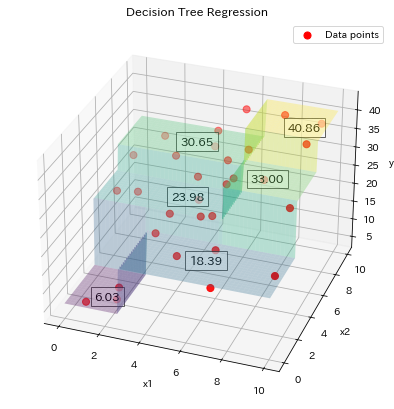

In [66]:
# 3次元プロットの作成
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', s=50, label='Data points')

# 決定木による回帰面の描画
ax.plot_surface(xx, yy, predictions, alpha=0.3, cmap='viridis')

# 各領域の平均値を表示
leaf_nodes = tree.apply(X)
for leaf in np.unique(leaf_nodes):
    mask = leaf_nodes == leaf
    mean_y = np.mean(y[mask])
    mean_x1 = np.mean(X[mask, 0])
    mean_x2 = np.mean(X[mask, 1])
    ax.text(mean_x1, mean_x2, mean_y, f'{mean_y:.2f}', color='black', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')  # z軸ラベルの位置を調整

# ビュー角度の調整
ax.view_init(elev=30., azim=-70)

plt.title('Decision Tree Regression')
plt.legend()
# グラフをPNGファイルとして保存
#plt.savefig('Decision Tree Regression.png', facecolor='white', dpi=150)
plt.show()

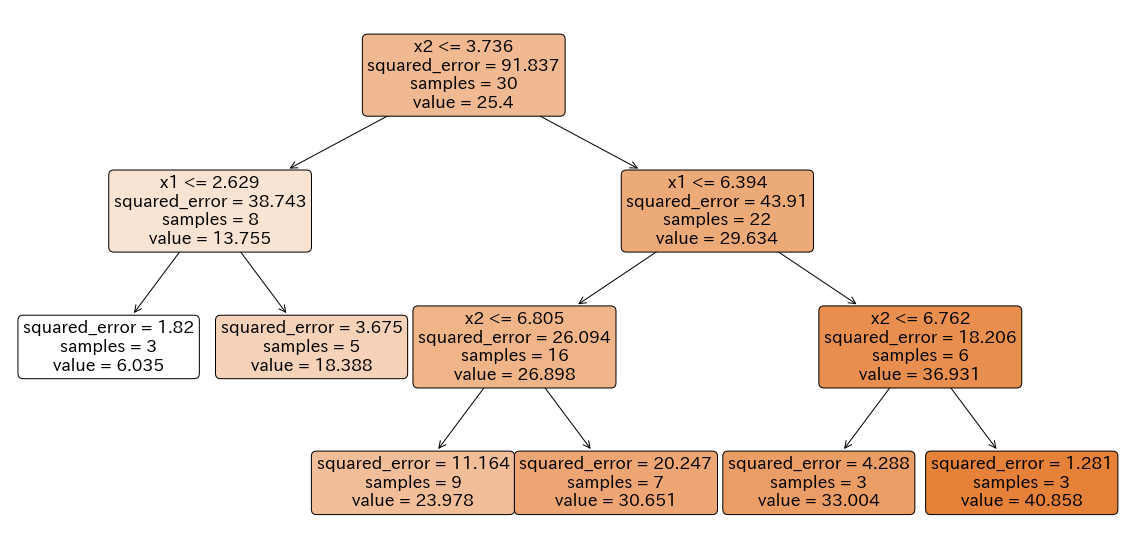

In [67]:
# ツリーマップの作成
fig = plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=['x1', 'x2'], filled=True, rounded=True)
# グラフをPNGファイルとして保存
#plt.savefig('Decision Tree Structure.png', facecolor='white', dpi=150)
plt.show()